In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [4]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [5]:
### Logistic Regression

In [6]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X_norm)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X_norm.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

## 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

Для этого отнормируем X

In [7]:
X_norm = X.copy()

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())

In [9]:
X_norm[3] = (X[3] - X[3].min()) / (X[3].max() - X[3].min())

In [10]:
eval_model(X_norm, y, iterations=100000, alpha=1e-2)

10000 [-0.23205161 -0.71456724  0.77641367  5.36267191] 0.4241755964843293
20000 [-0.22946089 -0.91518402  0.34756954  7.45070888] 0.37743021621915485
30000 [-0.18217238 -1.02007811 -0.24710146  8.86652442] 0.35354291264498305
40000 [-0.11965637 -1.08311395 -0.87692346  9.9545919 ] 0.3376104782523013
50000 [-0.05286877 -1.12583401 -1.49386293 10.85849284] 0.3255536381107503
60000 [ 0.01372194 -1.15826714 -2.07966166 11.64883512] 0.3158127008053517
70000 [ 0.07831958 -1.1854475  -2.62874147 12.36398642] 0.307629803989056
80000 [ 0.14030871 -1.20998631 -3.14124745 13.02626961] 0.30056972874088567
90000 [ 0.19960166 -1.23324532 -3.61982332 13.64938085] 0.29435423994199905
100000 [ 0.25633606 -1.25592247 -4.06802733 14.2421182 ] 0.28879333067358476


array([ 0.25633606, -1.25592247, -4.06802733, 14.2421182 ])

## 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [11]:
W = eval_model(X_norm, y, iterations=100000, alpha=5*1e-1)

10000 [  1.69713397  -2.04128541 -14.2690534   30.25308036] 0.19452850994371207
20000 [  2.71573413  -2.71223237 -21.60868345  42.77458174] 0.15150484566937017
30000 [  3.39612617  -3.1961868  -26.75695712  51.70400676] 0.12997328133818667
40000 [  3.90616828  -3.57480235 -30.77398733  58.69967043] 0.11682861037519628
50000 [  4.31536593  -3.88673645 -34.11343692  64.50584624] 0.10778255432082892
60000 [  4.65836676  -4.15282304 -37.00693093  69.51282143] 0.1010465956786201
70000 [  4.95471255  -4.38545658 -39.58713865  73.94843208] 0.09574650154171507
80000 [  5.21644247  -4.59258445 -41.93646941  77.95644146] 0.09140445178260803
90000 [  5.45148308  -4.77960965 -44.10925086  81.63302735] 0.08773685588083599
100000 [  5.66533181  -4.95038239 -46.14294311  85.04551428] 0.0845644474316965


## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [12]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [13]:
calc_pred_proba(W, X_norm)

array([0.31571543, 0.00119614, 1.        , 0.02296622, 0.97254321,
       0.00854318, 1.        , 0.0071326 , 0.67149388, 1.        ])

## 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [14]:
def calc_pred(W, X):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    y_pred = list(map(int,np.round(y_pred)))
    return y_pred

In [15]:
y_pred = calc_pred(W, X_norm)
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

## 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [16]:
def calc_errors(y, y_pred):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(y.shape[0]):
        if y_pred[i] == 1:
            if y[i] == 1:
                TP += 1
            else:
                FP +=1
        if y_pred[i] == 0:
            if y[i] == 1:
                FN += 1
            else:
                TN += 1
#     print(TP, FP, '\n', FN, TN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = (precision * recall) / (precision + recall) * 2
    print('Accuracy = ', accuracy)
    print('Precision = ', precision)
    print('Recall = ', recall)
    print('F1 score = ', f1)
    return np.array([[TP, FP], [FN, TN]])

In [17]:
def plot_conf_matrix(cm, classes, title = 'Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text( j, i, cm[i,j],
                 horizontalalignment="center", 
                 verticalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 score =  1.0
[[5 0]
 [0 5]]


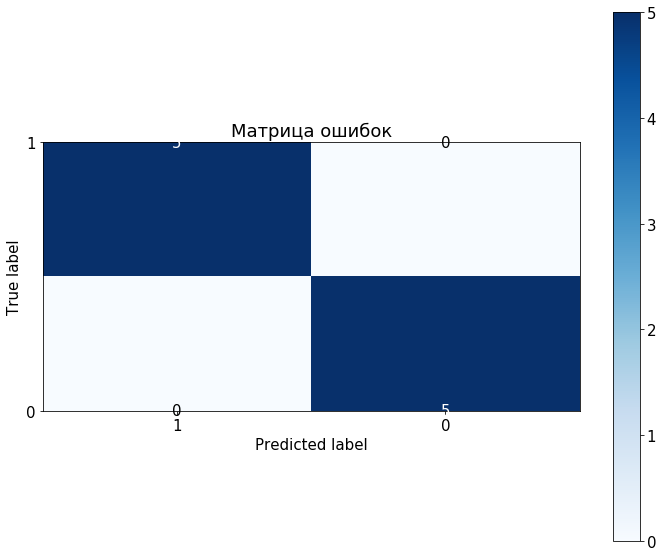

In [18]:
font = {'size': 15}
plt.rc('font', **font)
plt.figure(figsize=(10,8))
plot_conf_matrix(calc_errors(y, y_pred), classes=['1', '0'])

## 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [22]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X_norm)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X_norm.T) + lambda_)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [28]:
eval_model_l1(X_norm, y, iterations = 1000000, alpha=1e-2, lambda_=1e-3)

100000 [ 0.24823128 -1.21276685 -4.2018449  13.99180412] 0.2898312539446785
200000 [ 0.69642453 -1.41944299 -7.55719535 18.78720498] 0.25332584298849825
300000 [  1.04711494  -1.61036544 -10.03466495  22.68395331] 0.23020971144348876
400000 [  1.3434905   -1.78215691 -12.12092975  26.06884782] 0.2128363442427285
500000 [  1.60104146  -1.93725016 -13.95150791  29.08125828] 0.19902294512236396
600000 [  1.8283601   -2.07810941 -15.58842582  31.79722326] 0.18772142287410426
700000 [  2.03124741  -2.2067785  -17.06964133  34.26809719] 0.17829470538472678
800000 [  2.21396547  -2.32493461 -18.42192426  36.53221853] 0.17031181434285084
900000 [  2.37977897  -2.43396142 -19.66549957  38.61960471] 0.16346507036314167
1000000 [  2.53125146  -2.53500819 -20.81622043  40.55437162] 0.15752763812159126


array([  2.53125146,  -2.53500819, -20.81622043,  40.55437162])

In [29]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X_norm)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X_norm.T) + lambda_ * W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [36]:
eval_model_l2(X_norm, y, iterations = 1000000, alpha=5*1e-2, lambda_=1e-8)

100000 [  1.69693656  -2.041161   -14.26767338  30.25074598] 0.19453247796549739
200000 [  2.71547993  -2.71205517 -21.60681131  42.77132948] 0.1515112792603015
300000 [  3.39578469  -3.19593605 -26.75433285  51.69941424] 0.1299813865559954
400000 [  3.90572106  -3.57446347 -30.77042217  58.69343081] 0.11683818223831129
500000 [  4.31480008  -3.88629881 -34.10877265  64.49771267] 0.10779352835865423
600000 [  4.65767256  -4.15227861 -37.00102554  69.50258287] 0.10105895622515601
700000 [  4.95388232  -4.3847992  -39.57986001  73.935901  ] 0.09576025472154268
800000 [  5.21546995  -4.59180928 -41.92769234  77.941447  ] 0.09141961489167164
900000 [  5.45036298  -4.77871283 -44.0988558   81.61541116] 0.08775345217103674
1000000 [  5.66405951  -4.94936071 -46.13081562  85.02512794] 0.08458250307977229


array([  5.66405951,  -4.94936071, -46.13081562,  85.02512794])